In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from fonctions_tests import *

data = pd.read_csv("./data/matchs_2013_2022.csv")

add_manager_win_percentage_before(data)
add_club_win_percentage_with_referee_before(data)

# je crois que les 2 sont globalement la meme chose mais au pire on pourra dire que osef et on en retirera une apres
add_club_scores(data)
add_price_players(data)

add_updated_stats_players_team_mean(data)

print(data.columns)
data.head()

Index(['Unnamed: 0', 'game_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'results',
       'home_club_manager_win_percentage_before',
       'away_club_manager_win_percentage_before',
       'home_club_win_percentage_with_referee_before',
       'away_club_win_percentage_with_referee_before', 'score_away_team',
       'score_home_team', 'transfer_home_team', 'transfer_away_team',
       'home_club_avg_goals_per_game_updated',
       'home_club_avg_assists_per_game_updated',
       'home_club_avg_yellow_cards_per_game_updated',
       'home_club_avg_red_cards_per_game_updated',
       'away_club_avg_goals_per_game_updated',
       'away_club_avg_assists_p

,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,12850.0,480.0,123.579692,118.422916,161.750455,100.956715,114.952992,115.685339,145.030063,103.672756
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,0.0,3700.0,117.559406,110.052019,144.110488,101.499979,115.905138,114.907099,152.706016,100.982975
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,2520.0,3650.0,109.672593,110.773536,141.699589,103.487114,155.996558,129.430345,163.389242,101.314765
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,62100.0,0.0,145.792055,124.718132,148.306784,101.909770,117.559406,110.052019,144.110488,101.499979
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,0.0,62100.0,120.571681,113.389672,140.557162,102.557308,145.792055,124.718132,148.306784,101.909770


In [3]:
X = data[["attendance", "home_club_manager_win_percentage_before", "away_club_manager_win_percentage_before", "home_club_win_percentage_with_referee_before", "away_club_win_percentage_with_referee_before"]] #, "score_away_team", "score_home_team", "transfer_home_team", "transfer_away_team"]]
y = data[["results"]]
# X = data[["attendance", "home_club_manager_win_percentage", "away_club_manager_win_percentage", "home_club_win_percentage_with_referee", "away_club_win_percentage_with_referee", "score_away_team", "score_home_team", "transfer_home_team", "transfer_away_team"]] # 
X = data.drop(columns=["stadium","aggregate","attendance","competition_type","results","referee","home_club_formation","away_club_formation","home_club_name","away_club_name","Unnamed: 0", "season","round","date","home_club_manager_name","away_club_manager_name","home_club_goals", "away_club_goals","home_club_position","away_club_position"])
X.head()

,game_id,home_club_id,away_club_id,home_club_manager_win_percentage_before,away_club_manager_win_percentage_before,home_club_win_percentage_with_referee_before,away_club_win_percentage_with_referee_before,score_away_team,score_home_team,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
0,2330874,618,595,0.066327,0.055556,0.000000,0.666667,81.567038,188.724000,12850.0,480.0,123.579692,118.422916,161.750455,100.956715,114.952992,115.685339,145.030063,103.672756
1,2330880,14171,855,0.070707,0.000000,0.333333,NaN,74.769105,31.855883,0.0,3700.0,117.559406,110.052019,144.110488,101.499979,115.905138,114.907099,152.706016,100.982975
2,2330916,1423,1082,0.000000,0.107692,0.500000,0.250000,244.679289,23.689626,2520.0,3650.0,109.672593,110.773536,141.699589,103.487114,155.996558,129.430345,163.389242,101.314765
3,2331018,273,14171,0.044776,0.059406,0.500000,0.000000,31.855883,371.824554,62100.0,0.0,145.792055,124.718132,148.306784,101.909770,117.559406,110.052019,144.110488,101.499979
4,2331034,1147,273,0.000000,0.029412,0.000000,0.500000,371.824554,57.169593,0.0,62100.0,120.571681,113.389672,140.557162,102.557308,145.792055,124.718132,148.306784,101.909770


In [4]:
X.describe()

,game_id,home_club_id,away_club_id,home_club_manager_win_percentage_before,away_club_manager_win_percentage_before,home_club_win_percentage_with_referee_before,away_club_win_percentage_with_referee_before,score_away_team,score_home_team,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
count,4.078000e+03,4078.000000,4078.000000,4078.000000,4078.000000,3491.000000,3520.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,2.935466e+06,1095.466160,1094.685140,0.222700,0.145854,0.383370,0.386706,230.843606,231.051570,28529.259441,28471.844041,152.089341,124.468424,155.715211,101.973462,152.034587,124.445475,155.723067,101.973381
std,5.068788e+05,1730.980074,1731.133943,0.158622,0.119951,0.294634,0.292569,175.830965,176.045400,52439.289851,52326.496043,59.524360,15.953681,9.027656,0.660822,59.438940,15.929914,9.034141,0.660896
min,2.223841e+06,40.000000,40.000000,0.000000,0.000000,0.000000,0.000000,18.911152,18.911152,0.000000,0.000000,108.894012,110.052019,140.557162,100.695910,108.894012,110.052019,140.557162,100.695910
25%,2.482368e+06,415.000000,415.000000,0.090909,0.055556,0.166667,0.166667,112.783735,112.783735,3650.000000,3650.000000,120.571681,115.685339,148.306784,101.319307,120.571681,115.685339,148.306784,101.319307
50%,2.942690e+06,855.000000,855.000000,0.210526,0.125000,0.363636,0.372685,176.483410,176.483410,12850.000000,12850.000000,132.695514,120.246801,154.834746,101.938133,132.695514,120.246801,154.834746,101.938133
75%,3.394684e+06,1158.000000,1158.000000,0.326531,0.208333,0.525063,0.539263,308.167983,308.167983,30200.000000,30200.000000,145.792055,125.950027,162.892226,102.311661,145.792055,125.950027,162.892226,102.311661
max,3.840454e+06,14171.000000,14171.000000,0.809524,0.684211,1.000000,1.000000,801.536097,801.536097,247000.000000,247000.000000,376.773868,182.915104,201.412086,103.672756,376.773868,182.915104,201.412086,103.672756


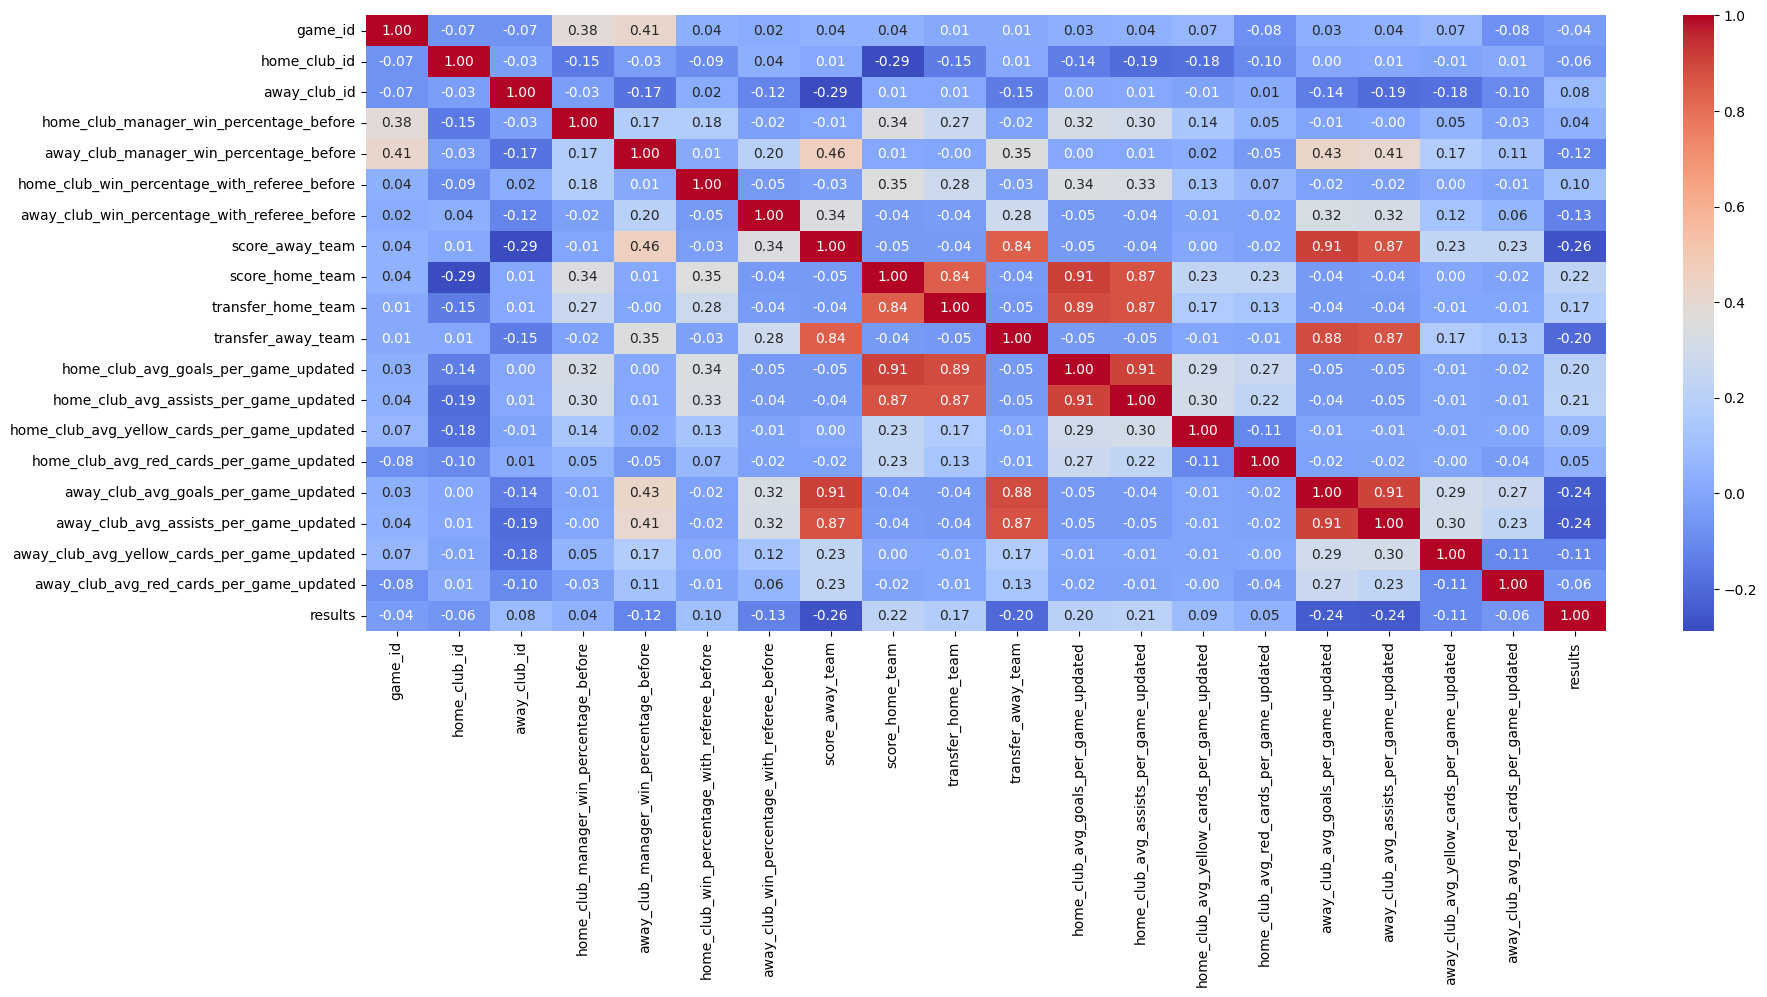

In [5]:
import seaborn as sns

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()

corr_mat = pd.DataFrame(X)
corr_mat['results'] = y
plot_correlation_matrix(corr_mat)

In [6]:
X = SimpleImputer(strategy='mean').fit_transform(X)

## Calcul des scores de précision de différents modèles

In [8]:
import sklearn.discriminant_analysis as DA
from fonctions_tests import test_data
# Define the names of the classifications method
names = ["LogisticRegression",
         "NBayes",
         "LDA",
         "QDA",
         "KNN",
         "SVM linear",
         "SVM rbf",
         "SVM sigmoid",
         "RandomForest",
         "DecisionTree"]

# Define the classifiers
classifiers = [LogisticRegression(C=1e5),
               GaussianNB(),
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors=5),
               SVC(kernel='linear', C=1.0),
               SVC(kernel='rbf', gamma = 1e-4),
               SVC(kernel='sigmoid', gamma = 1e-4),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Ignore warnings
from warnings import simplefilter
simplefilter(action='ignore')

# Loop through all different classfication methods
for name, clf in zip(names, classifiers):

    accuracy = test_data(X, y, model=clf)

    print("Accuracy with ", name, " : ", round(accuracy,3))

TypeError: test_data() got multiple values for argument 'model'

In [ ]:
# test hyperparameter C for SVM linear
cv = 7
all_accuracies = {}
accuracies = []
sizes = [0.01, 0.1, 1, 10, 100]
for c in sizes:
    for i in range(cv):
        accuracy = test_data(data.iloc[np.random.choice(data.index, size=int(len(data) * 0.6), replace=False)], model=SVC(kernel='linear', C=c))
        if(c not in all_accuracies): all_accuracies[c] = []
        all_accuracies[c].append(accuracy)
        # print("\tAccuracy with ", name, " : ", round(accuracy,3))
    accuracies.append(np.mean(all_accuracies[c]))
    print('fini with c = ', c)
    
print("\nAccuracies : ", list(zip(sizes, accuracies)))

plt.plot(np.log10(sizes), accuracies)

In [10]:
from fonctions_tests import add_manager_win_percentage, add_club_win_percentage_with_referee, add_club_scores, add_price_players, add_updated_stats_players_team_mean

warnings.filterwarnings("ignore")

data = pd.read_csv("./data/matchs_2013_2022.csv")

add_manager_win_percentage(data)
add_club_win_percentage_with_referee(data)

# je crois que les 2 sont globalement la meme chose mais au pire on pourra dire que osef et on en retirera une apres
add_club_scores(data)
add_price_players(data)

add_updated_stats_players_team_mean(data)

data.head()

,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,12850.0,480.0,123.579692,118.422916,161.750455,100.956715,114.952992,115.685339,145.030063,103.672756
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,0.0,3700.0,117.559406,110.052019,144.110488,101.499979,115.905138,114.907099,152.706016,100.982975
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,2520.0,3650.0,109.672593,110.773536,141.699589,103.487114,155.996558,129.430345,163.389242,101.314765
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,62100.0,0.0,145.792055,124.718132,148.306784,101.909770,117.559406,110.052019,144.110488,101.499979
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,0.0,62100.0,120.571681,113.389672,140.557162,102.557308,145.792055,124.718132,148.306784,101.909770


In [11]:
y = data[["results"]]
data = data.drop(columns=["stadium","aggregate","attendance","competition_type","referee","home_club_formation","away_club_formation","home_club_name","away_club_name","Unnamed: 0", "season","round","home_club_manager_name","away_club_manager_name","home_club_goals", "away_club_goals","home_club_position","away_club_position"])
X = data.drop(columns=['results'])
X.head()

,game_id,date,home_club_id,away_club_id,home_club_manager_win_percentage,away_club_manager_win_percentage,home_club_win_percentage_with_referee,away_club_win_percentage_with_referee,score_away_team,score_home_team,transfer_home_team,transfer_away_team,home_club_avg_goals_per_game_updated,home_club_avg_assists_per_game_updated,home_club_avg_yellow_cards_per_game_updated,home_club_avg_red_cards_per_game_updated,away_club_avg_goals_per_game_updated,away_club_avg_assists_per_game_updated,away_club_avg_yellow_cards_per_game_updated,away_club_avg_red_cards_per_game_updated
0,2330874,2013-09-28,618,595,0.571429,0.166667,0.217391,0.333333,81.567038,188.724000,12850.0,480.0,123.579692,118.422916,161.750455,100.956715,114.952992,115.685339,145.030063,103.672756
1,2330880,2013-10-19,14171,855,0.393939,0.254237,0.428571,0.200000,74.769105,31.855883,0.0,3700.0,117.559406,110.052019,144.110488,101.499979,115.905138,114.907099,152.706016,100.982975
2,2330916,2013-11-30,1423,1082,0.214286,0.276923,0.200000,0.500000,244.679289,23.689626,2520.0,3650.0,109.672593,110.773536,141.699589,103.487114,155.996558,129.430345,163.389242,101.314765
3,2331018,2014-01-18,273,14171,0.313433,0.178218,0.461538,0.200000,31.855883,371.824554,62100.0,0.0,145.792055,124.718132,148.306784,101.909770,117.559406,110.052019,144.110488,101.499979
4,2331034,2014-02-08,1147,273,0.166667,0.338235,0.500000,0.387097,371.824554,57.169593,0.0,62100.0,120.571681,113.389672,140.557162,102.557308,145.792055,124.718132,148.306784,101.909770


[0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]
fini with c =  0.0009765625  :  0.5851020408163266
fini with c =  0.001953125  :  0.5873469387755103
fini with c =  0.00390625  :  0.5869387755102039
fini with c =  0.0078125  :  0.5977551020408164
fini with c =  0.015625  :  0.6028571428571429
fini with c =  0.03125  :  0.5977551020408163
fini with c =  0.0625  :  0.6142857142857144
fini with c =  0.125  :  0.6071428571428572
fini with c =  0.25  :  0.5979591836734695
fini with c =  0.5  :  0.6067346938775511
fini with c =  1.0  :  0.5938775510204082
fini with c =  2.0  :  0.5922448979591837
fini with c =  4.0  :  0.593469387755102
fini with c =  8.0  :  0.5946938775510204
fini with c =  16.0  :  0.5940816326530612
fini with c =  32.0  :  0.593265306122449
fini with c =  64.0  :  0.5922448979591837
fini with c =  128.0  :  0.5991836734693877
fini with c =  256.0  :  0.59040816326530

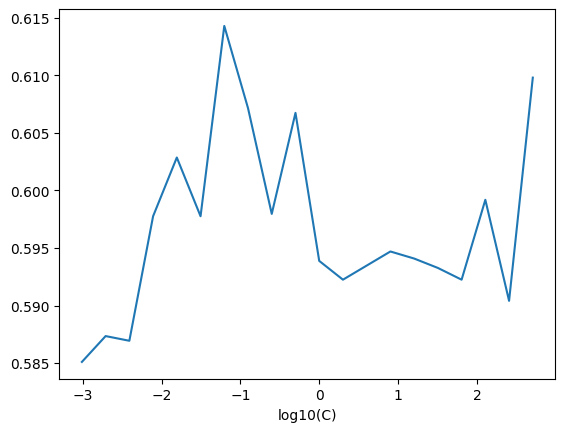

In [33]:
# test hyperparameter gamma for LogisticRegression
from math import exp, log, pow
cv = 10
all_accuracies = {}
accuracies = []
sizes = [pow(2, i) for i in range(-10, 10)]
print(sizes)
for c in sizes:
    for i in range(cv):
        accuracy = test_data(data.iloc[np.random.choice(data.index, size=int(len(data) * 0.6), replace=False)], model=LogisticRegression(C=c))
        if(c not in all_accuracies): all_accuracies[c] = []
        all_accuracies[c].append(accuracy)
        # print("\tAccuracy with ", name, " : ", round(accuracy,3))
    accuracies.append(np.mean(all_accuracies[c]))
    print('fini with c = ', c, " : ", accuracies[-1])

print("\nAccuracies : ", list(zip(sizes, accuracies)))

print("\nBest C : ", sizes[np.argmax(accuracies)], " with accuracy : ", accuracies[np.argmax(accuracies)])

fig = plt.figure()
plt.plot(np.log10(sizes), accuracies)
plt.xlabel('log10(C)')
fig.show()